In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
X = df.drop(columns = ["target", "flower_name"], axis = 1)
y = df["target"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier(n_estimators = 50, criterion = "entropy")

model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [29]:
score = model.score(X_test, y_test)
score

1.0

In [30]:
y_pred = model.predict(X_test)

Text(120.72222222222221, 0.5, 'truth')

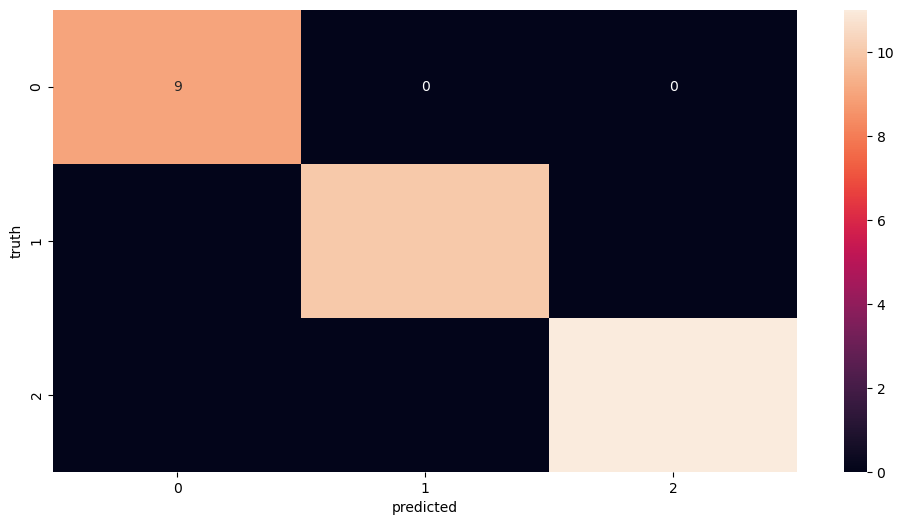

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline 

plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")